In [1]:
import pandas as pd
import holoviews as hv
import numpy as np
import scanpy as sc
from holoviews import opts, dim

import scipy.cluster.hierarchy as hc
from scipy.spatial.distance import pdist
from sklearn.preprocessing import scale
from scipy.cluster.hierarchy import dendrogram
import fastcluster

import loompy
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
import os

from urllib.request import urlretrieve
from sknetwork.hierarchy import cut_straight
import scipy.cluster.hierarchy as hc
import numpy_groupies as npg
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from scipy.stats import mode
from scipy import sparse
import seaborn
import matplotlib as mpl
import gget
import pickle
import networkx as nx
from umap import UMAP
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import NMF, PCA

# suppress INFO
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

# make font changeable in Illustrator
mpl.rcParams['pdf.fonttype'] = 42

# save figure with no pad
mpl.rcParams['savefig.pad_inches'] = 0
mpl.rcParams['savefig.bbox'] = 'tight'

# set axes width
mpl.rcParams['axes.linewidth'] = 0.2
mpl.rcParams['xtick.minor.pad'] = 0
mpl.rcParams['xtick.major.pad'] = 0
mpl.rcParams['ytick.minor.pad'] = 0
mpl.rcParams['ytick.major.pad'] = 0
mpl.rcParams['xtick.minor.width'] = 0.2
mpl.rcParams['xtick.major.width'] = 0.2
mpl.rcParams['ytick.minor.width'] = 0.2
mpl.rcParams['ytick.major.width'] = 0.2

# use colorblind seaborn style
plt.style.use('seaborn-colorblind')


/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def dna_to_twobit(dna: str) -> int:
/home/alej

In [2]:
adata = sc.read_h5ad('../DataSubmission/GBM_Linnarsson_EEL.h5ad')
#adata_tumor_sc.X = adata_tumor_sc.layers['smooth']

In [3]:
adata.obs['m-states'].cat.categories

Index(['AC-like 1', 'AC-like 2', 'AC-like 3', 'AC-like 4', 'AC-like 5',
       'AC-like 6', 'AC-like 7', 'DC', 'Endothelial 1', 'Erythrocyte 1',
       'FB-like 1', 'FB-like 2', 'FB-like 3', 'GBL-like 1', 'GBL-like 2',
       'GW-like 1', 'GW-like 2', 'GW-like 3', 'GW-like 4', 'GW-like 5',
       'GW-like 6', 'GW-like 7', 'GW-like 8', 'Mono 1', 'Mono 2',
       'Mural cell 1', 'Mural cell 2', 'OPC-like 1', 'OPC-like 2',
       'Oligodendrocyte 1', 'Oligodendrocyte 2', 'RG-like', 'TAM-BDM 1',
       'TAM-BDM 2', 'TAM-BDM 3', 'TAM-BDM 4', 'TAM-MG', 'nIPC-RG-like',
       'nIPC-like 1', 'nIPC-like 2', 'nIPC-like 3', 'preOPC-like 1',
       'unknown 1', 'unknown2 1'],
      dtype='object')

In [39]:
palette = {
    'AC-like 1':'#2ecc71',
    'AC-like 2':'#2ecc71',
    'AC-like 3':'#2ecc71',
    'AC-like 4':'#2ecc71',
    'AC-like 5':'#2ecc71',
    'AC-like 6':'#2ecc71',
    'AC-like 7':'#2ecc71',

    'preOPC-like 1':'#7befb2',

    'nIPC-like 1':'#FFF192',
    'nIPC-like 2':'#FFF192',
    'nIPC-like 3':'#FFF192',
    
    'RG-like':'#ff9470',
    'nIPC-RG-like':'#ff9470',
    
    'OPC-like 1':'#89c4f4', 
    'OPC-like 2':'#89c4f4',
    
    'GW-like 1':'#e76d89',# Deep cerise
    'GW-like 2':'#e76d89',# Deep cerise
    'GW-like 3':'#e76d89',# Deep cerise
    'GW-like 4':'#e76d89',# Deep cerise
    'GW-like 5':'#e76d89',# Deep cerise
    'GW-like 6':'#e76d89',# Deep cerise
    'GW-like 7':'#e76d89',# Deep cerise
    'GW-like 8':'#e76d89',# Deep cerise
    
    
    'Endothelial':'#d5b8ff', 
    'Mural': '#8c14fc',  

    'FB-like 2': '#FF6EC7', 
    'FB-like 3': '#FF6EC7',

    #'Mono 1': '#FBFCFA',
    #'Mono 2': '#FBFCFA',
    
    #'TAM-BDM 3':'#DC9D57',   
    #'TAM-BDM 4':'#DC9D57',
    #'TAM-MG':'#825e5c',
    #'DC': '#a6915c',
}



In [40]:
a = ['Endothelial' if x.count('Endothelial') else x for x in adata.obs['m-states']]
adata.obs['m-states'] = pd.Categorical(['Mural' if x.count('Mural') else x for x in a])


# Spatial Enrichment accross all samples

In [41]:
import squidpy as sq
import sys
sys.path.append('/wsfish/glioblastoma/')
import FISHspace as sp

SL001A


  0%|          | 0/1000 [00:00<?, ?/s]

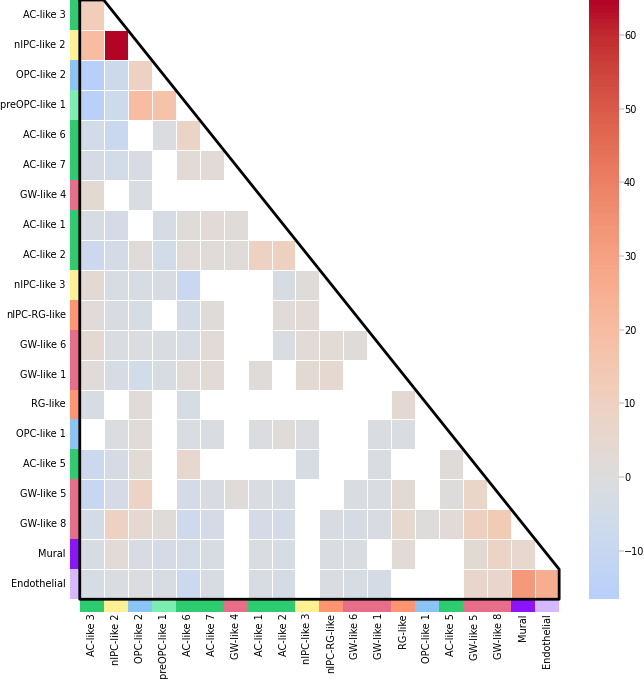

SL001B


  0%|          | 0/1000 [00:00<?, ?/s]

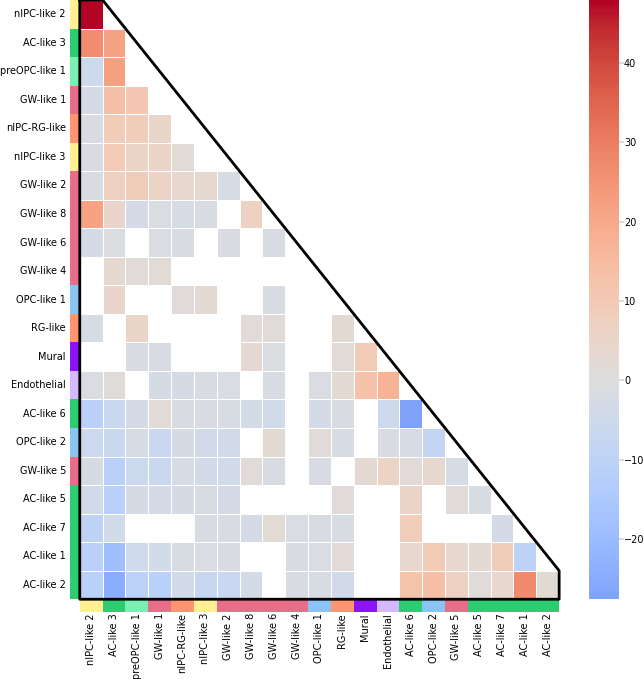

SL002


  0%|          | 0/1000 [00:00<?, ?/s]

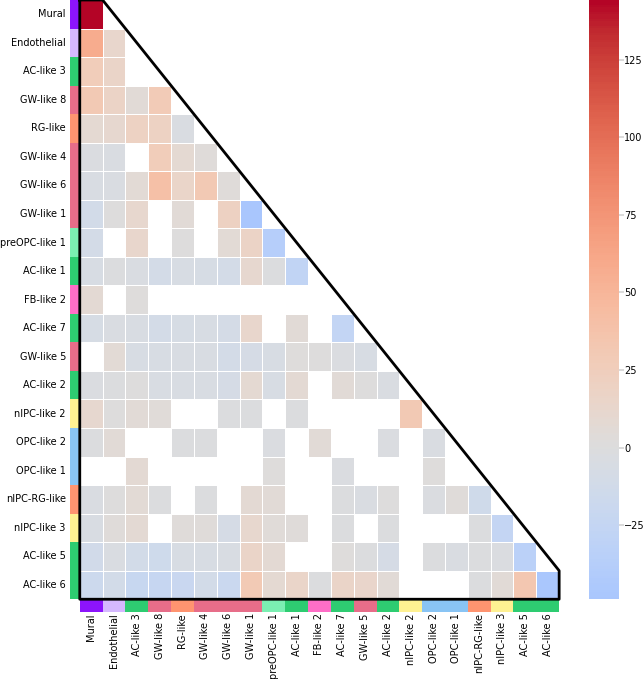

SL003


  0%|          | 0/1000 [00:00<?, ?/s]

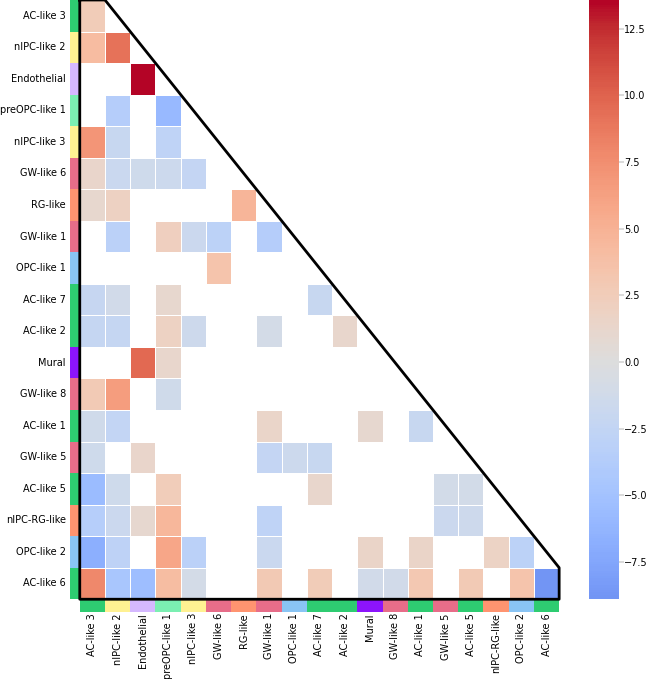

SL005


  0%|          | 0/1000 [00:00<?, ?/s]

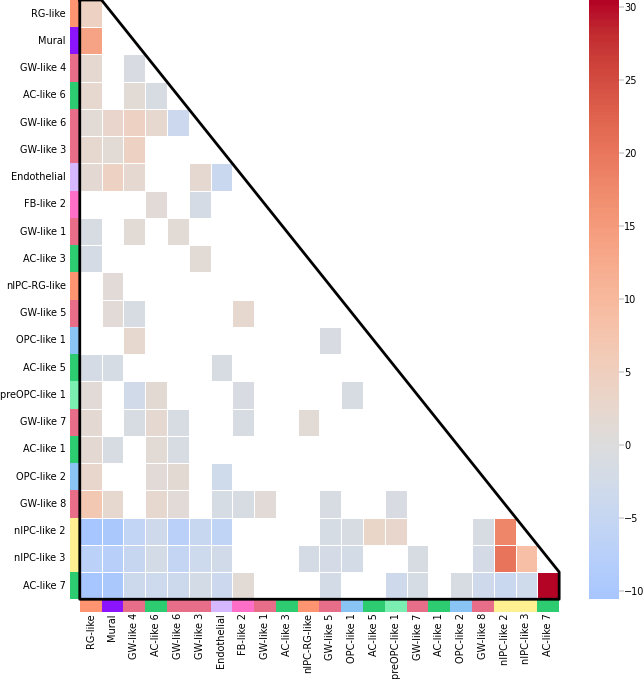

SL006


  0%|          | 0/1000 [00:00<?, ?/s]

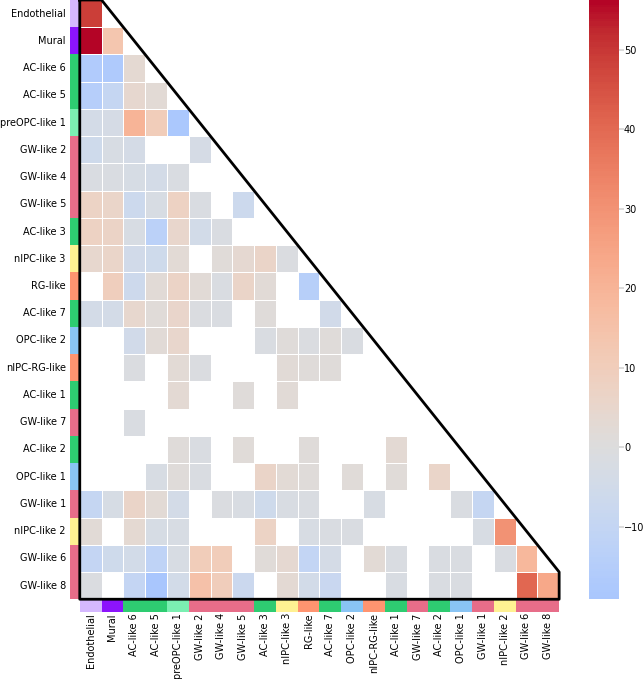

SL011


  0%|          | 0/1000 [00:00<?, ?/s]

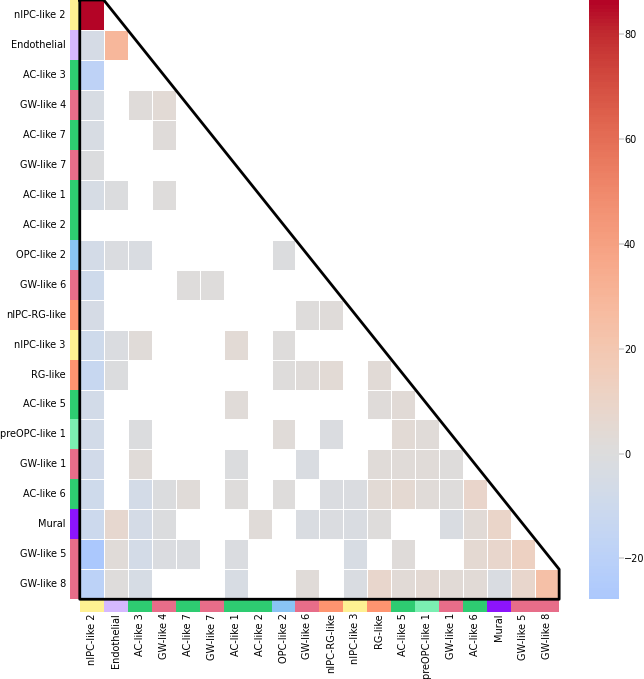

SL012


  0%|          | 0/1000 [00:00<?, ?/s]

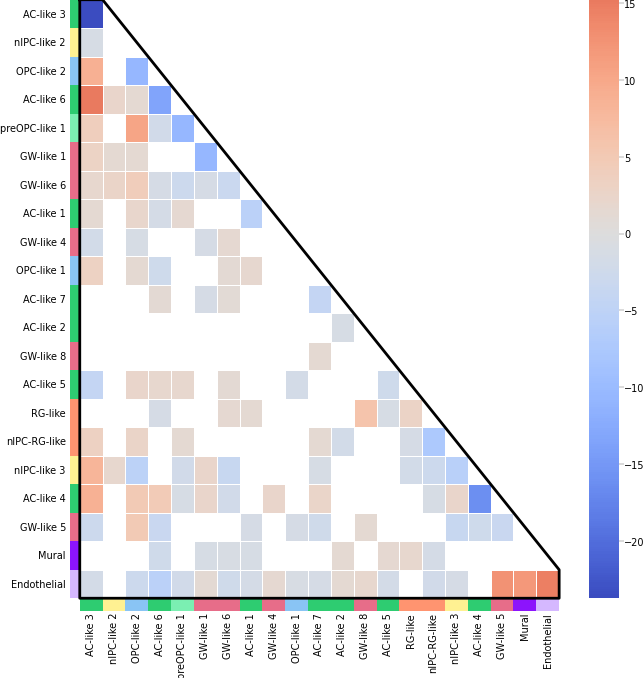

SL013


  0%|          | 0/1000 [00:00<?, ?/s]

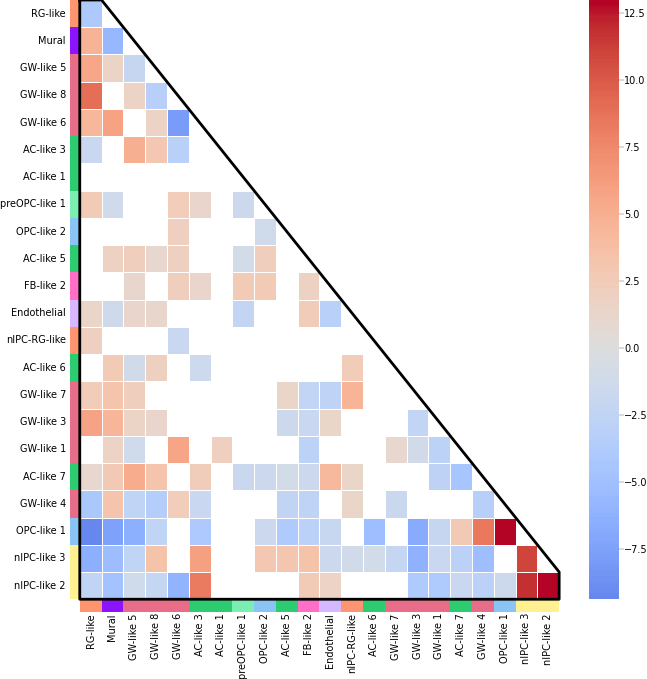

SL015


  0%|          | 0/1000 [00:00<?, ?/s]

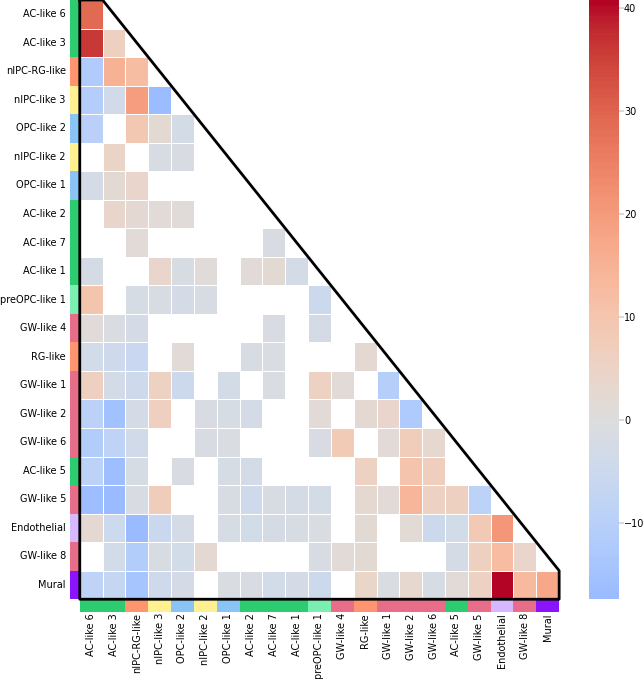

SL016A


  0%|          | 0/1000 [00:00<?, ?/s]

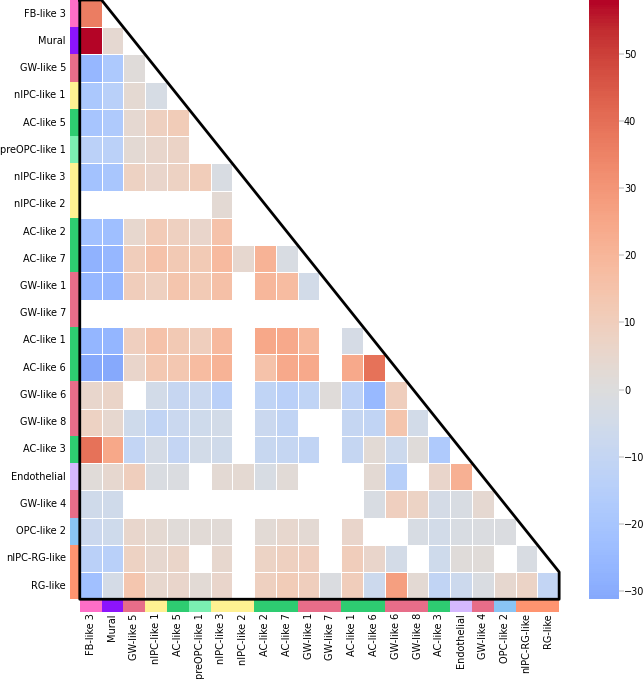

SL016B


  0%|          | 0/1000 [00:00<?, ?/s]

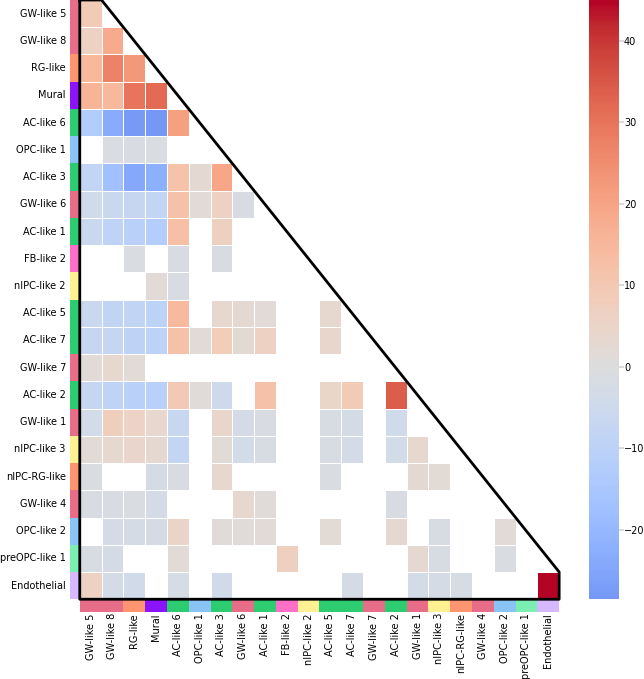

SL018


  0%|          | 0/1000 [00:00<?, ?/s]

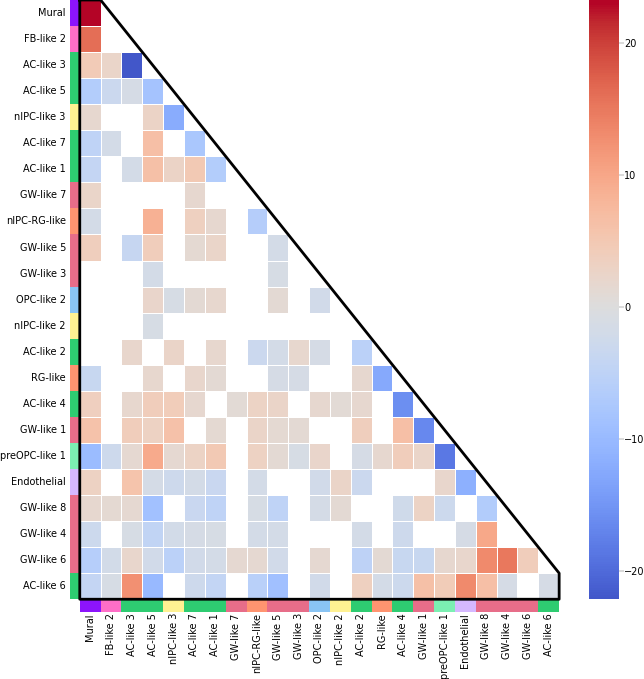

SL019


  0%|          | 0/1000 [00:00<?, ?/s]

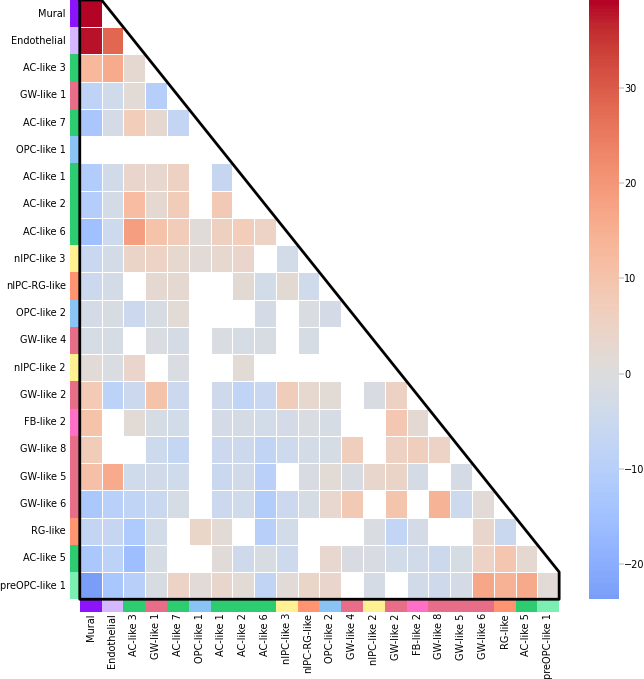

SL020


  0%|          | 0/1000 [00:00<?, ?/s]

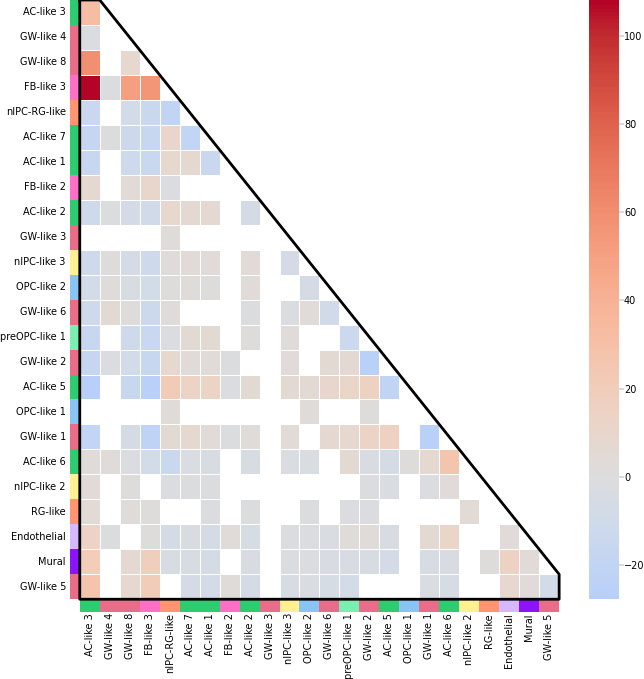

SL023


  0%|          | 0/1000 [00:00<?, ?/s]

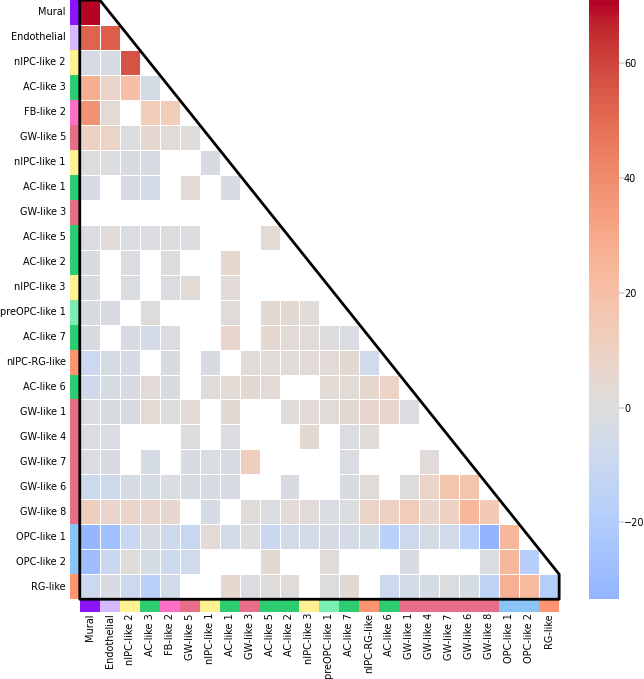

SL027B


  0%|          | 0/1000 [00:00<?, ?/s]

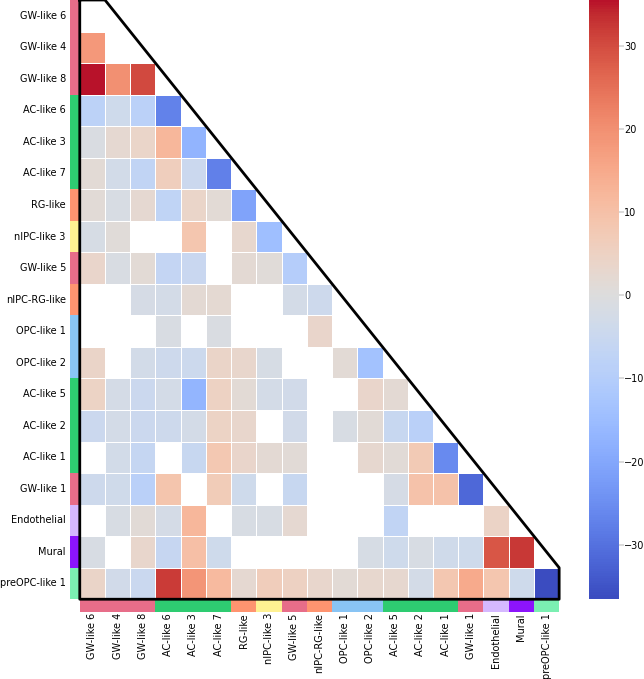

SL029


  0%|          | 0/1000 [00:00<?, ?/s]

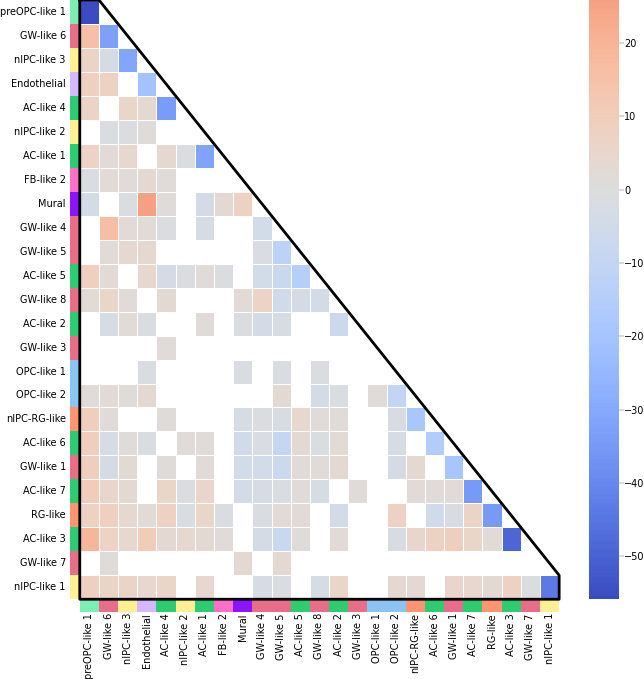

SL030


  0%|          | 0/1000 [00:00<?, ?/s]

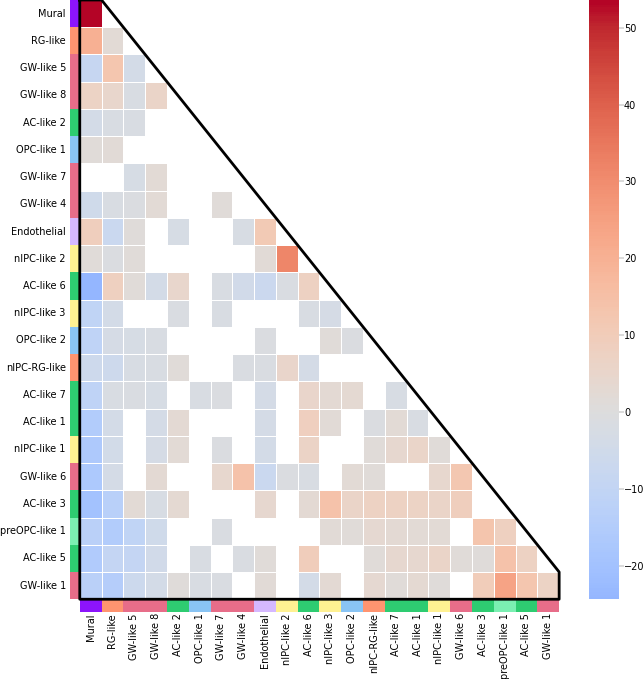

SL034


  0%|          | 0/1000 [00:00<?, ?/s]

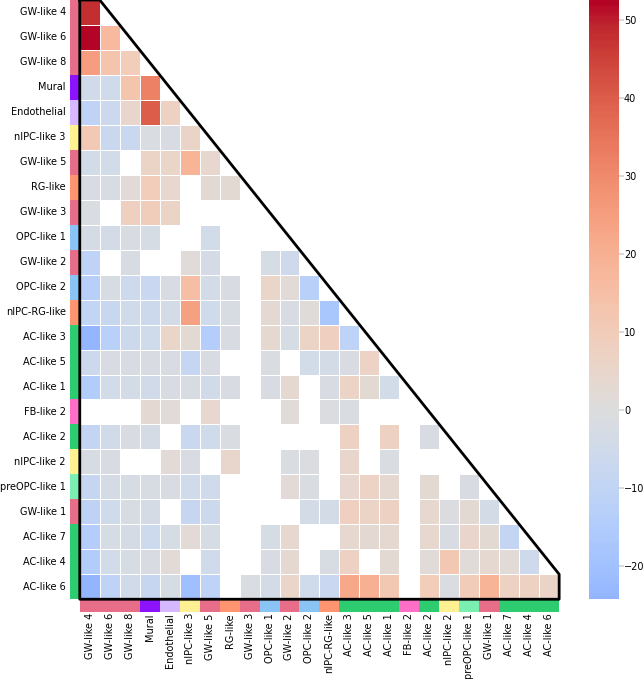

SL035A


  0%|          | 0/1000 [00:00<?, ?/s]

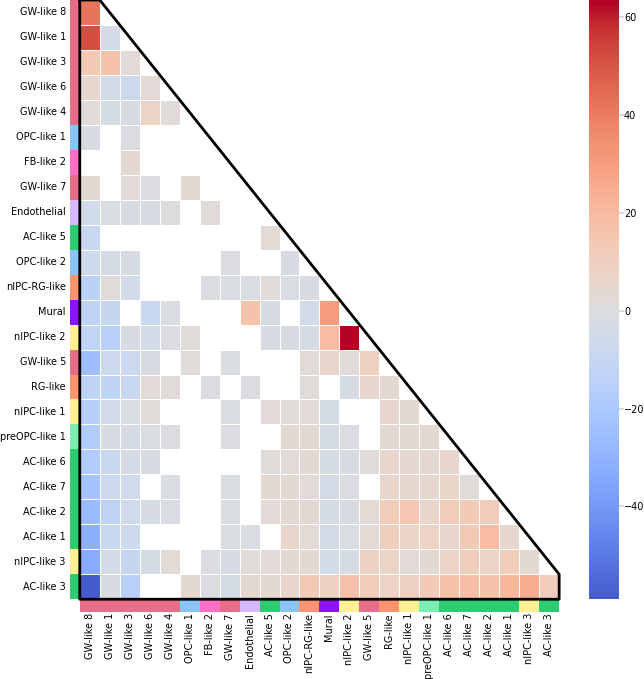

SL035B


  0%|          | 0/1000 [00:00<?, ?/s]

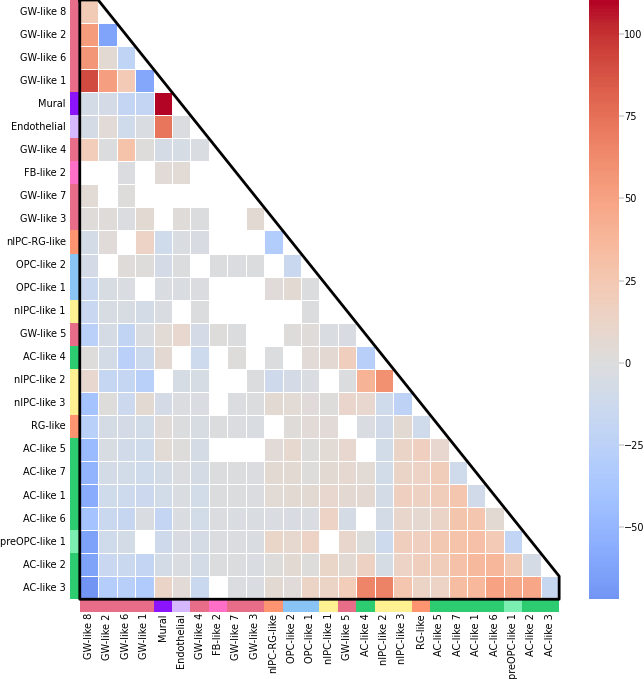

SL037


  0%|          | 0/1000 [00:00<?, ?/s]

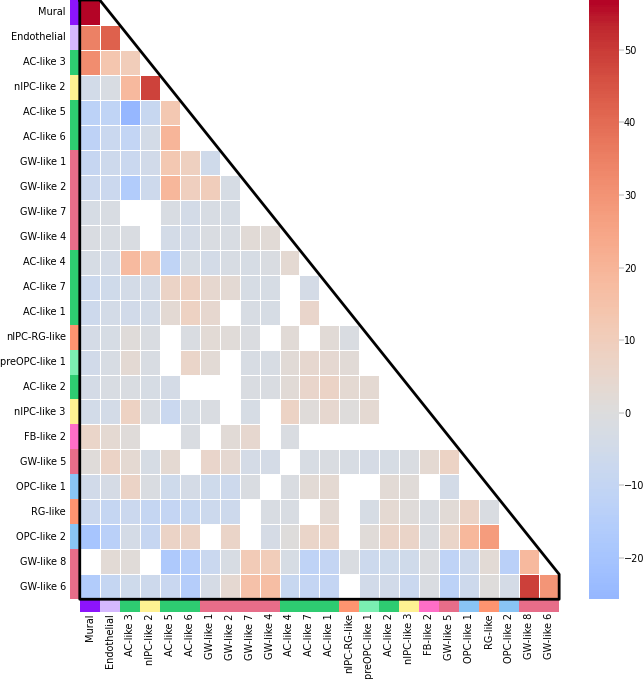

SL038


  0%|          | 0/1000 [00:00<?, ?/s]

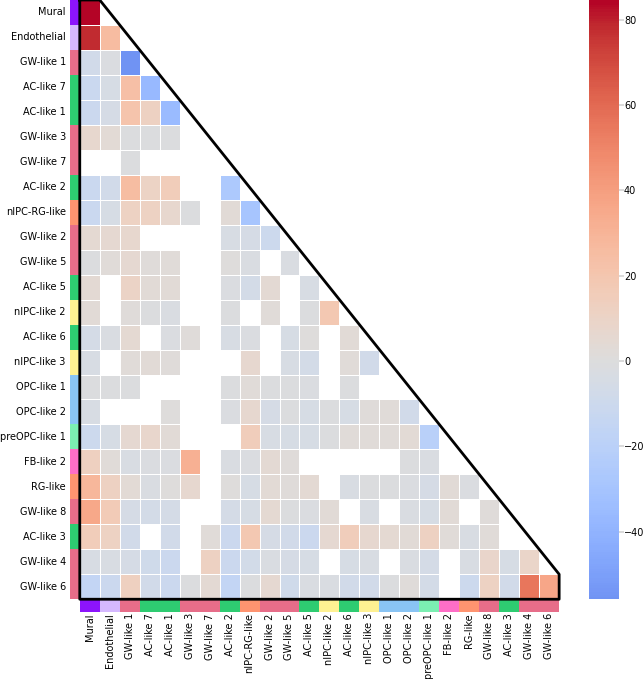

SL040B


  0%|          | 0/1000 [00:00<?, ?/s]

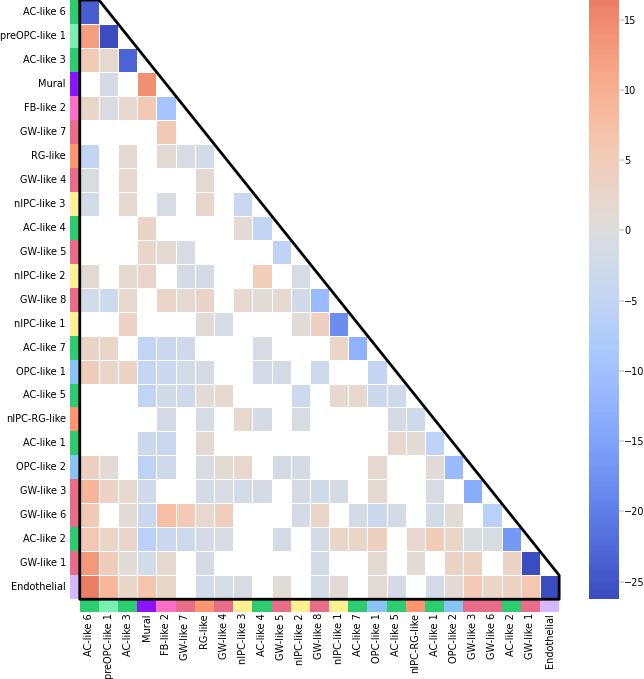

SL040Bulk


  0%|          | 0/1000 [00:00<?, ?/s]

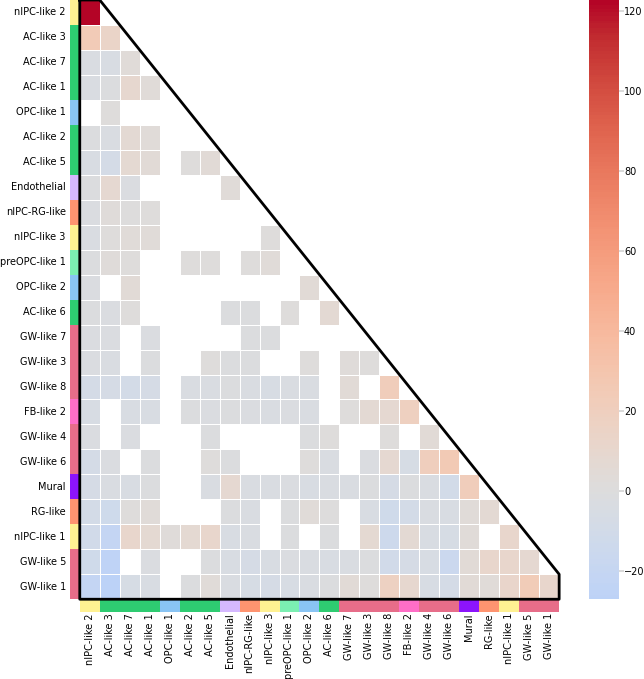

SL040C


  0%|          | 0/1000 [00:00<?, ?/s]

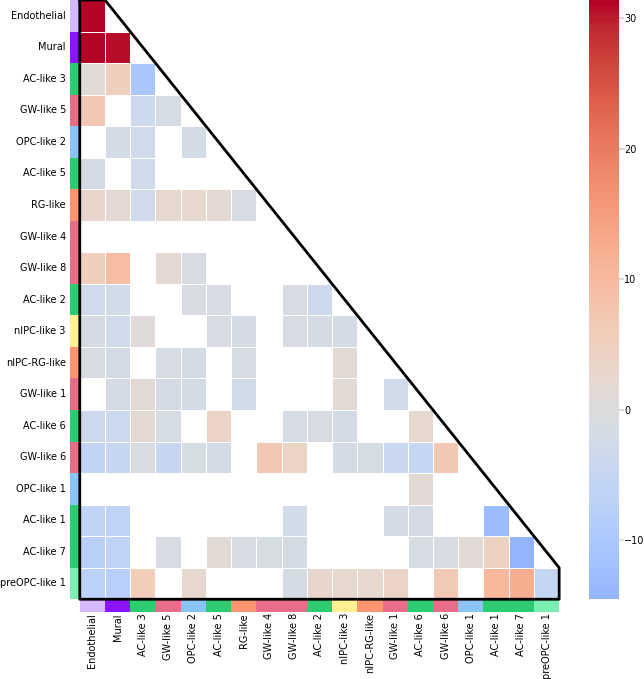

SL040D


  0%|          | 0/1000 [00:00<?, ?/s]

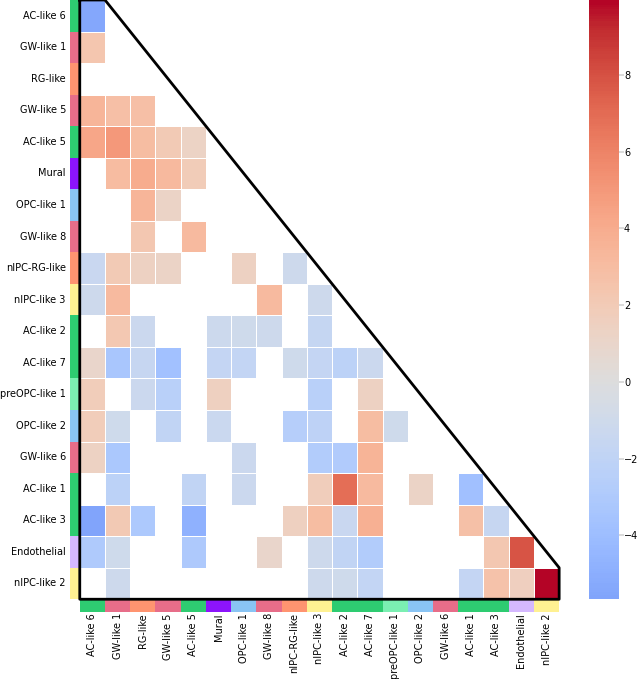

SL040E


  0%|          | 0/1000 [00:00<?, ?/s]

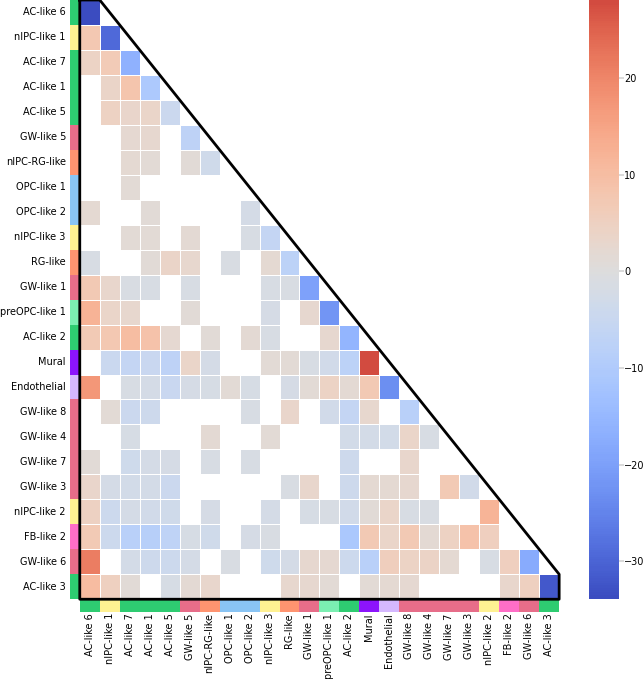

SL040F


  0%|          | 0/1000 [00:00<?, ?/s]

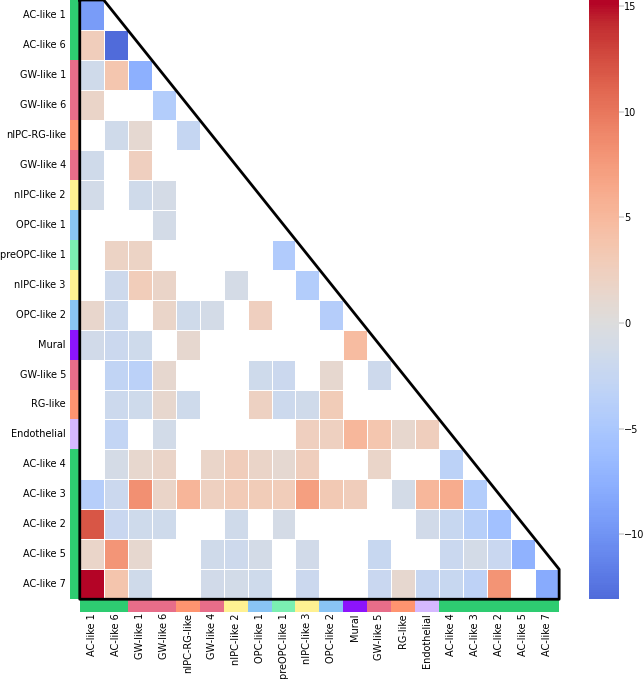

SL040G


  0%|          | 0/1000 [00:00<?, ?/s]

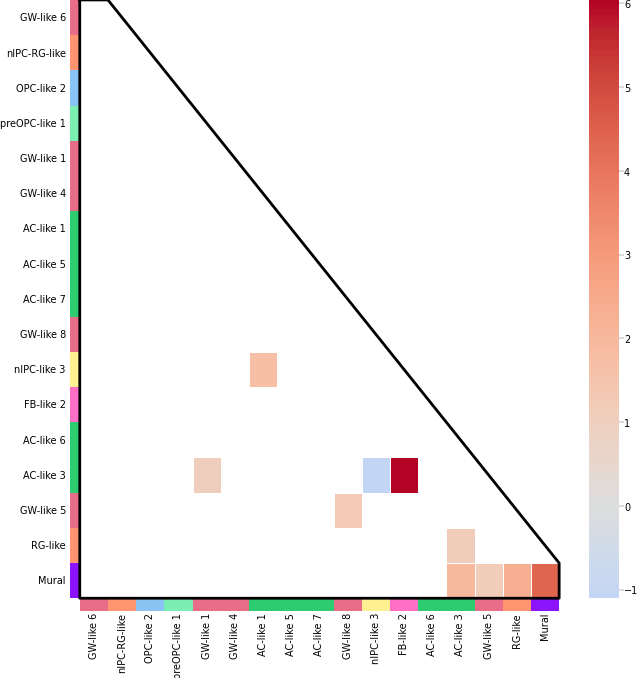

SL046A


  0%|          | 0/1000 [00:00<?, ?/s]

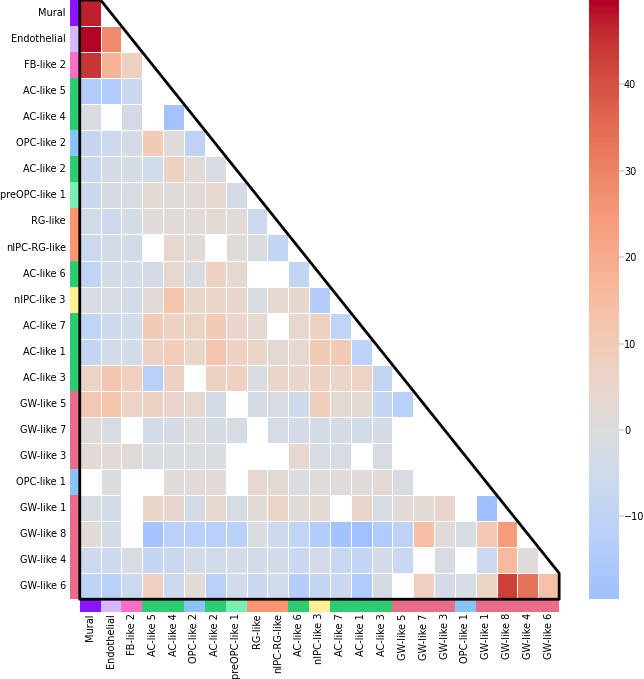

SL046B


  0%|          | 0/1000 [00:00<?, ?/s]

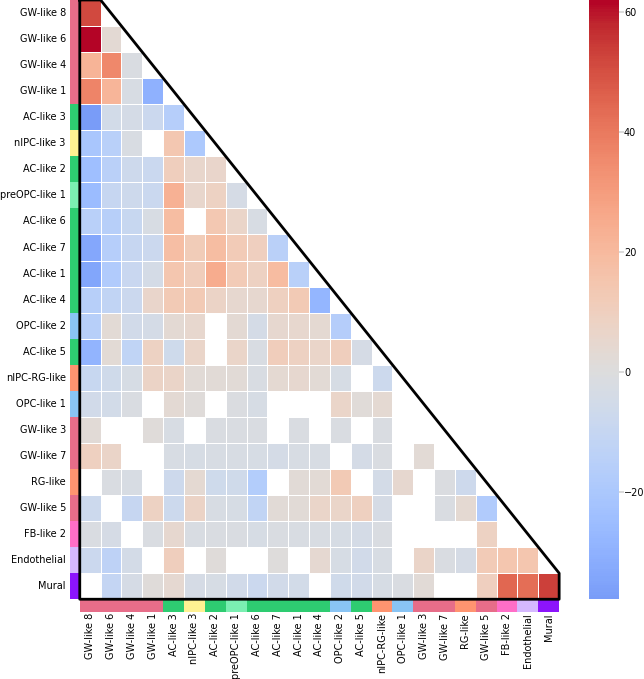

SL046C


  0%|          | 0/1000 [00:00<?, ?/s]

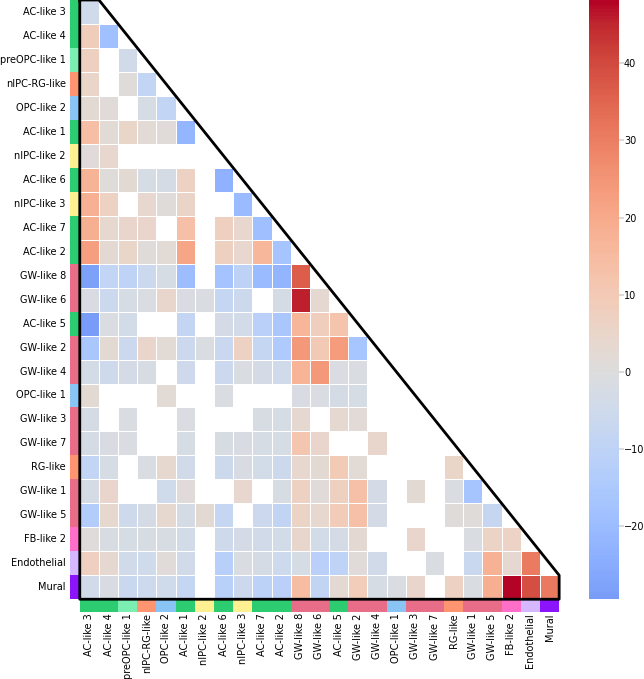

SL047B


  0%|          | 0/1000 [00:00<?, ?/s]

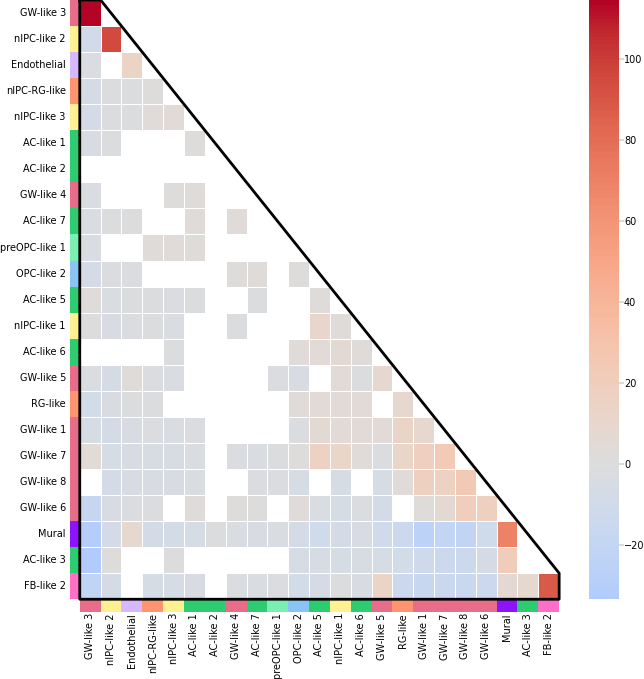

SL053


  0%|          | 0/1000 [00:00<?, ?/s]

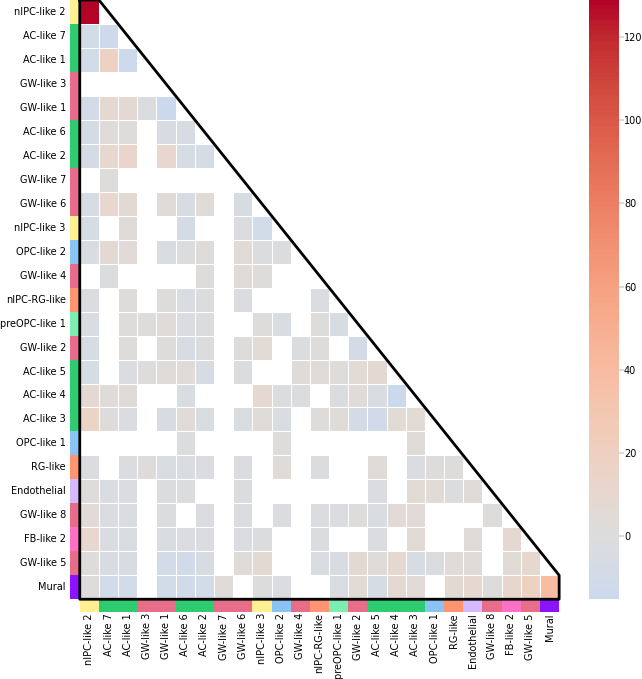

SL057A


  0%|          | 0/1000 [00:00<?, ?/s]

Could not analyse sample SL057A
SL057B


  0%|          | 0/1000 [00:00<?, ?/s]

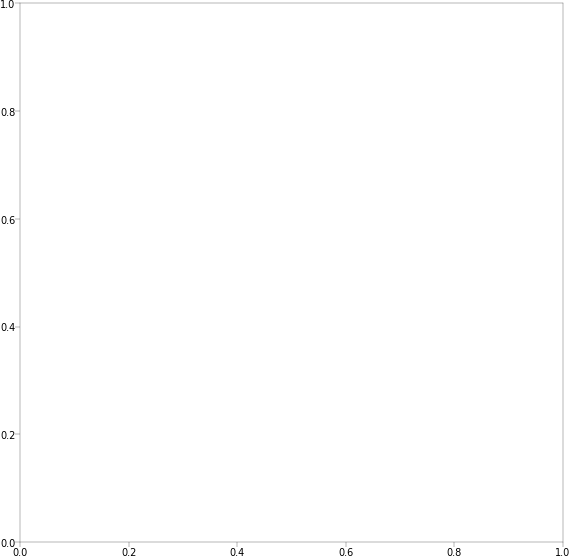

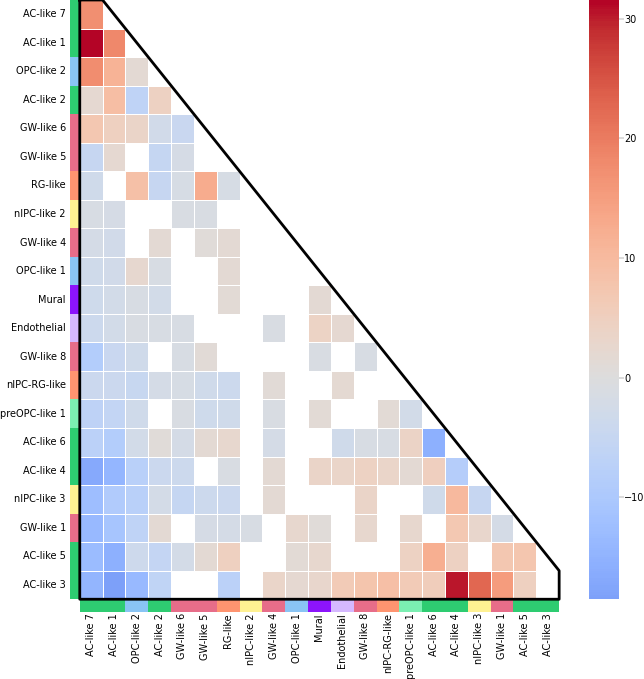

SL061A


  0%|          | 0/1000 [00:00<?, ?/s]

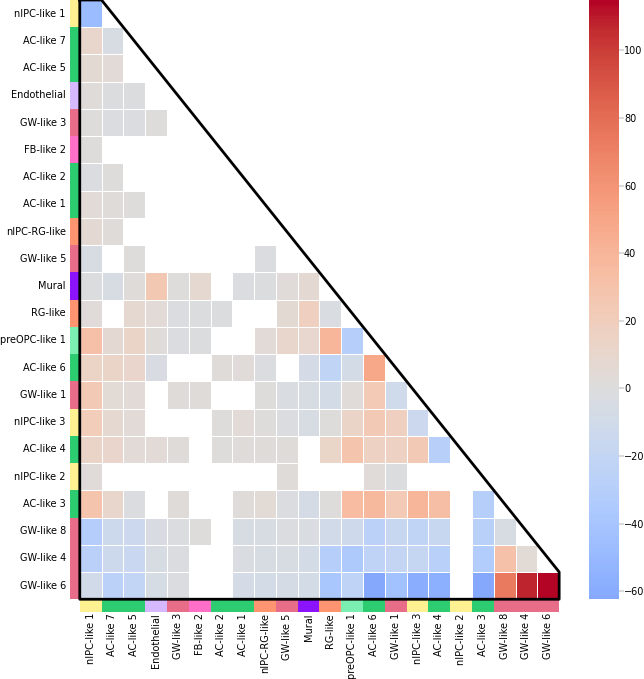

SL061B


  0%|          | 0/1000 [00:00<?, ?/s]

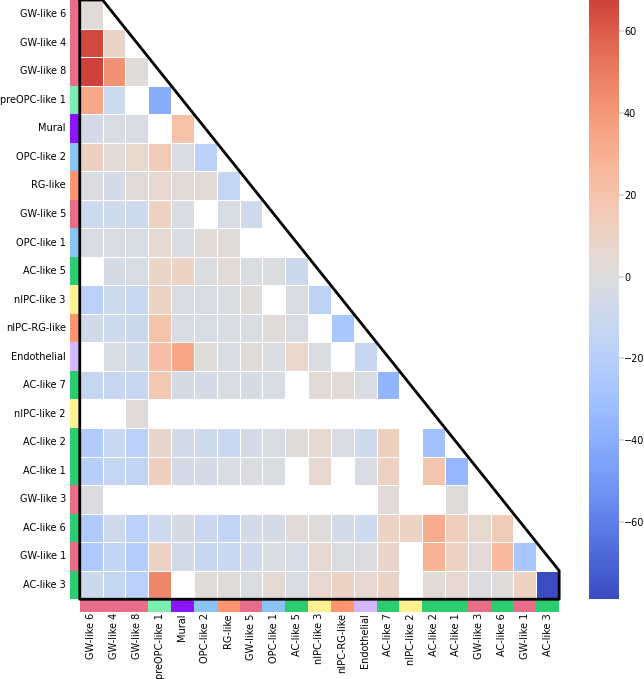

SL061C


  0%|          | 0/1000 [00:00<?, ?/s]

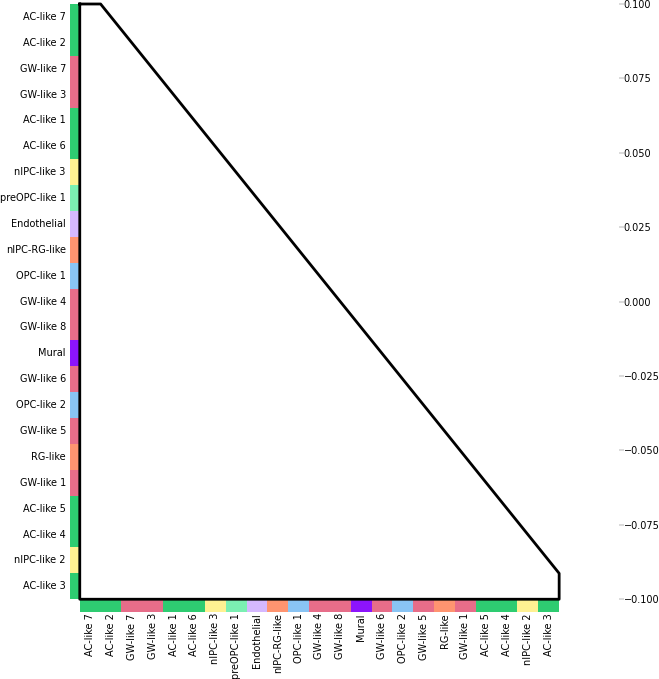

In [42]:
dic_nhood = {} 
samples = []
for s in adata.obs.Sample.cat.categories:
    print(s) 
    sadata = adata[adata.obs.Sample == s]
    sadata = sadata[sadata.X.sum(axis=1) > 20]
    selected_clusters = list(palette.keys())
    sadata_clusters = sadata[sadata.obs['m-states'].isin(selected_clusters)]
    try:
        if len(sadata_clusters.obs['m-states'].cat.categories) > 7:
            sq.gr.spatial_neighbors(sadata_clusters,coord_type="generic", n_neighs=7,delaunay=True, radius=(5,100))
            sq.gr.nhood_enrichment(sadata_clusters, cluster_key="m-states")

            df = pd.DataFrame(
                                data=sadata_clusters.uns['m-states_nhood_enrichment']['zscore'], 
                                index=sadata_clusters.obs['m-states'].cat.categories,
                                columns=sadata_clusters.obs['m-states'].cat.categories,
                            )

            sp.pl.neighborhood_enrichment_from_pandas(
                df, 
                palette=palette,
                save=True,
                figsize=(7,7),
                mask_down=-1,
                mask_up = 1,
                savepath=f'figures/figures_nn/NN_{s}.pdf'
            )

            full_df = pd.DataFrame(np.zeros([len(selected_clusters), len(selected_clusters)]), index=selected_clusters, columns=selected_clusters)
            for s1 in selected_clusters:
                for s2 in selected_clusters:
                    try:
                        v = df[s1][s2]
                    except:
                        v = 0
                    full_df[s1][s2] = v
            dic_nhood[s] = full_df
            samples.append(s)
    except:
        print(f'Could not analyse sample {s}')
            



SL038


  0%|          | 0/1000 [00:00<?, ?/s]

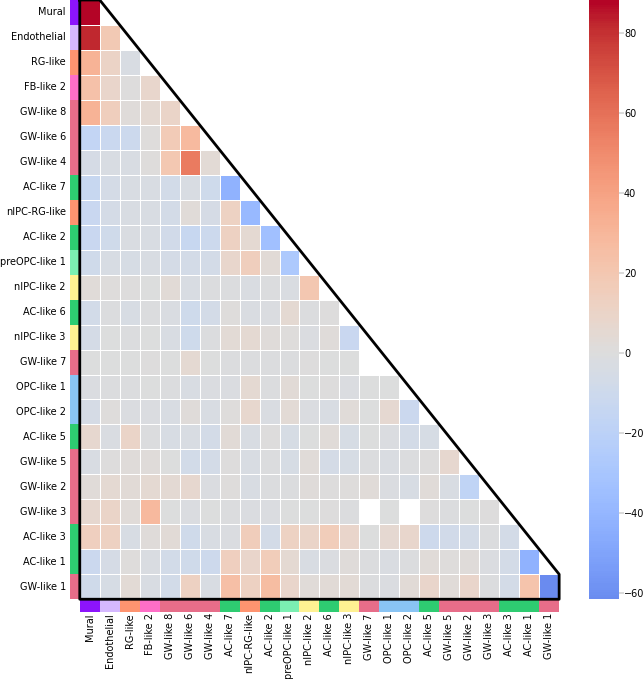

SL061C


  0%|          | 0/1000 [00:00<?, ?/s]

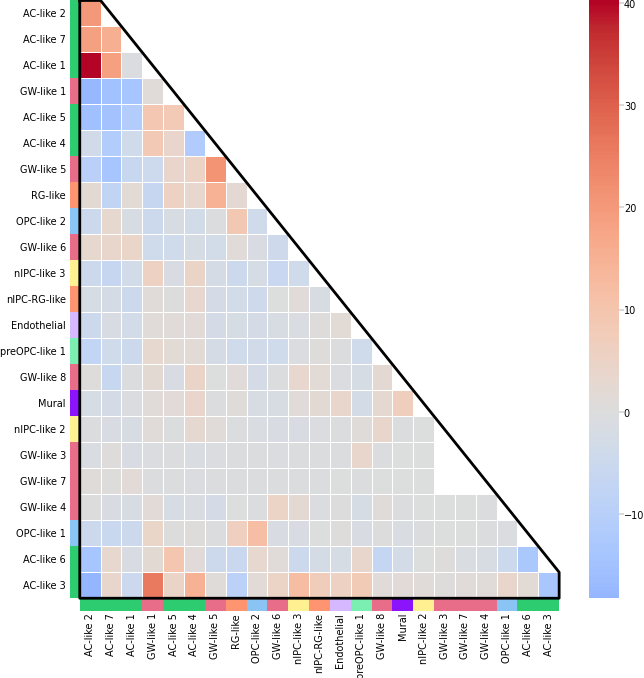

In [43]:

samples = []
for s in ['SL038','SL061C']:
    print(s) 
    sadata = adata[adata.obs.Sample == s]
    sadata = sadata[sadata.X.sum(axis=1) > 10]
    selected_clusters = list(palette.keys())
    sadata_clusters = sadata[sadata.obs['m-states'].isin(selected_clusters)]

    if len(sadata_clusters.obs['m-states'].cat.categories) > 7:
        sq.gr.spatial_neighbors(sadata_clusters,coord_type="generic", n_neighs=10,delaunay=True, radius=(1,100))
        sq.gr.nhood_enrichment(sadata_clusters, cluster_key="m-states")
        sadata_clusters.uns['m-states_nhood_enrichment']['zscore'] = np.nan_to_num(
                                                                                    sadata_clusters.uns['m-states_nhood_enrichment']['zscore'],posinf=0,neginf=0
                                                                                )

        df = pd.DataFrame(
                            data=sadata_clusters.uns['m-states_nhood_enrichment']['zscore'], 
                            index=sadata_clusters.obs['m-states'].cat.categories,
                            columns=sadata_clusters.obs['m-states'].cat.categories,
                        )

        sp.pl.neighborhood_enrichment_from_pandas(
            df, 
            palette=palette,
            save=True,
            figsize=(7,7),
            mask_down=0,
            mask_up = 0,
            savepath=f'figures/figures_nn/NN_{s}.pdf'
        )

        full_df = pd.DataFrame(np.zeros([len(selected_clusters), len(selected_clusters)]), index=selected_clusters, columns=selected_clusters)
        for s1 in selected_clusters:
            for s2 in selected_clusters:
                try:
                    v = df[s1][s2]
                except:
                    v = 0
                full_df[s1][s2] = v
        dic_nhood[s] = full_df
        samples.append(s)

            



In [49]:
import pickle
dic_nhood = pickle.load(open('NN_Enrichment.pkl', 'rb'))

In [50]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, RobustScaler
import scipy.cluster.hierarchy as hc
from scipy.spatial.distance import pdist
from sklearn.preprocessing import scale
from scipy.cluster.hierarchy import dendrogram
import fastcluster

mutation_df = pd.read_parquet('MutationsPatients.parquet')
import seaborn as sns
_palette = sns.color_palette("hls", mutation_df.shape[1])
paletteMutations = {}
for col, gene in zip(_palette, mutation_df.columns):
    paletteMutations[gene] = col

organization = {
        'GBM': ['IDH', '1p19q'],
        'RTK': ['PIK3','EGFRamp', 'EGFRmut', 'PDGFRA', 'PDGFA', 'PTEN', 'NF1'],
        'p53': ['p53', 'MDM'],
        'RB':['RB1','CDK2NA/B','CDK'],
        'Other':['DNMT3A','MGMT','TERT','GLI1','MET']
                }

mutation_loc = [
    'IDH', '1p19q', 
    'PIK3','EGFRamp', 'EGFRmut', 'PDGFRA', 'PDGFA', 'PTEN', 'NF1',
    'p53', 'MDM',
    'RB1','CDK2NA/B','CDK',
    'DNMT3A','MGMT','TERT','GLI1','MET',
]


paletteMutations = {}
#for col, gene in zip(_palette, mutation_df.columns):
#    paletteMutations[gene] = col
#for m in organization:
#    
_palette = sns.color_palette("hls", mutation_df.shape[1]+2)
print(len(_palette), len(mutation_loc))
for c, m in zip(_palette, mutation_loc):
    #print(c,m)
    paletteMutations[m] = c
    

21 19


In [51]:
df_samples = pd.DataFrame(
    data=np.array(
        [
            StandardScaler().fit_transform(dic_nhood[k].values).flatten() for k in dic_nhood
            #dic_nhood[k].values.flatten() for k in dic_nhood
        ]
    ).T, 
    columns=list(dic_nhood.keys())
)


In [52]:
metric = 'correlation'
method = 'ward'
D = pdist(df_samples.dropna().T, metric=metric)
#D[np.isnan(D)] = 0
Z = fastcluster.linkage(D, method=method, metric=metric, preserve_input=True)
Z = hc.optimal_leaf_ordering(Z, D, metric=metric)
ordering_samples = hc.leaves_list(Z)

/tmp/ipykernel_794317/2240394595.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


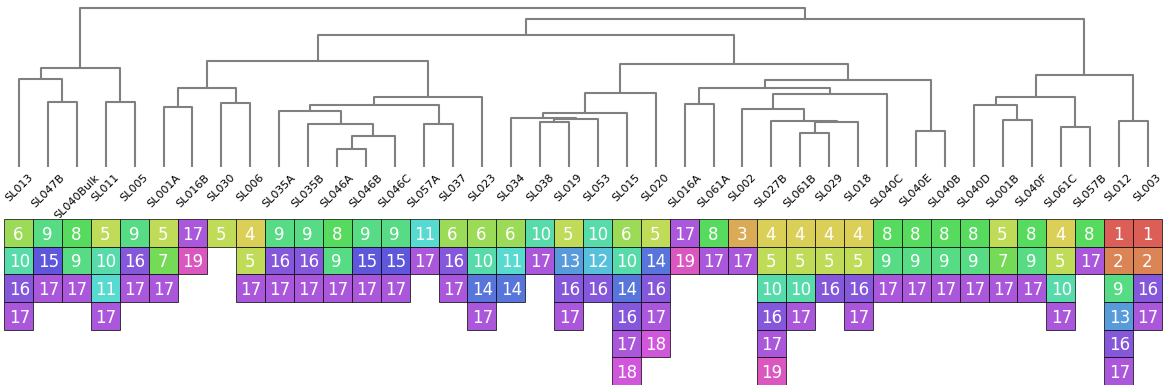

In [53]:
from matplotlib.patches import Rectangle
figsize = (15,5)
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=figsize, sharex=True,gridspec_kw={'hspace':0.3}, height_ratios=(2,2))

ax = axs[0]
samples = adata.obs.Sample.unique()
out = dendrogram(Z,labels=df_samples.columns, ax = ax, above_threshold_color='gray', color_threshold=0)
spines = ["top","right","left","bottom"]
for s in spines:
    ax.spines[s].set_visible(False)
ax.set_yticks([])
ax = axs[1]

for i,s in enumerate(samples[ordering_samples]):
    patient = s[:5]
    mut = mutation_df.loc[patient]
    mut = mut[mut != 0].index.tolist()
    for c, m in enumerate(mut):
        #loc = mutation_loc.index(m)
        #ax.scatter(i*10+5, loc,marker='s', s=150, color=paletteMutations[m])
        ax.add_patch(Rectangle(
            xy=(i*10, c*10) ,width=10, height=10,fill=True,edgecolor='black',facecolor = paletteMutations[m],#color=paletteMutations[m], 
            linewidth=.5, )
            )
        
        if mutation_loc.index(m)+1 > 9:
            extra=1.5
        else:
            extra = 3
        ax.annotate(
            text=mutation_loc.index(m)+1, xy=(i*10+extra, c*10+7.5),fontsize=12,color='white',
            )
            
ax.set_yticks([])
#ax.set_xticks([])
spines = ["top","right","left","bottom"]
for s in spines:
    ax.spines[s].set_visible(False)
ax.invert_yaxis()   
ax.set_xlim(-.1*figsize[0], len(ordering_samples)*10+.1)
ax.set_ylim((len(mutation_loc)+1)*3, -.5)
#plt.setp(axs[0].get_xticklabels(),visible=True, color="r")
axs[0].tick_params(labelbottom=True)
axs[1].tick_params(labelbottom=False)
plt.tight_layout()
plt.show()

# Spatial

In [5]:
grey = adata.obs['m-states'].cat.categories[adata.obs['m-states'].cat.categories.isin(palette.keys())].tolist()

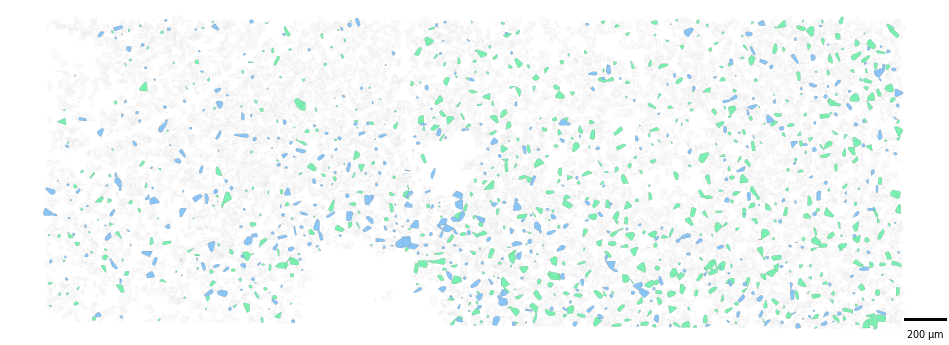

In [9]:
selected = ['preOPC-like 1', 'OPC-like 2']
sp.pl.plot_polygons(
    adata,
    'SL001B',
    cluster_key= 'm-states',
    clusters = selected, 
    grey_clusters=grey,
    palette = palette,
    show_axis=False,
    area_min_size=10,
    alpha=1,
    figsize=(10,10),
    xlim = (7000, 11000),
    ylim = (1000, 3000), 

)

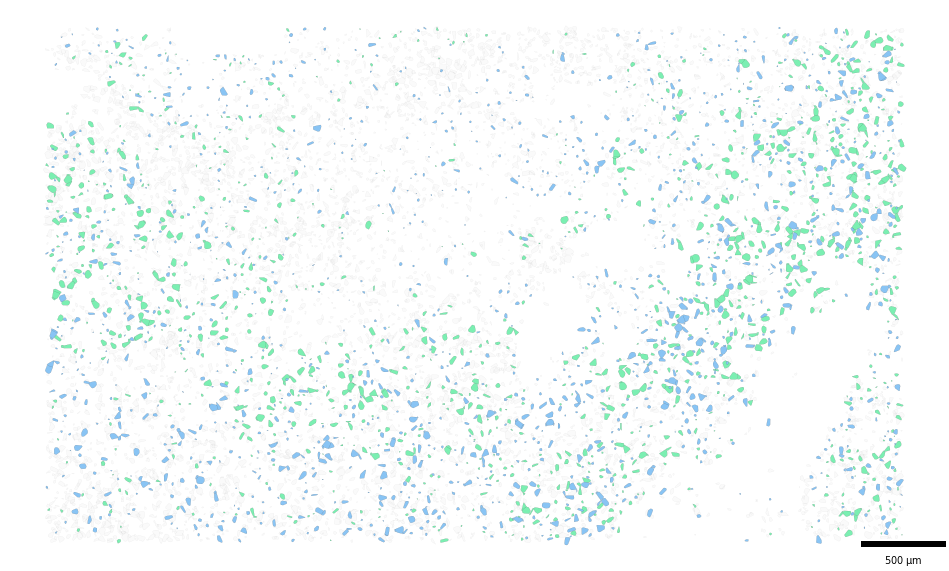

In [10]:
selected = ['preOPC-like 1', 'OPC-like 2']
sp.pl.plot_polygons(
    adata,
    'SL001A',
    cluster_key= 'm-states',
    clusters = selected, 
    grey_clusters=grey,
    palette = palette,
    show_axis=False,
    area_min_size=1,
    alpha=1,
    #gray_color='#eeeeee',
    alpha_gray=0.25,
    figsize=(10,10),
    xlim = (2500,7500),
    ylim = (3000,6000),
    
)

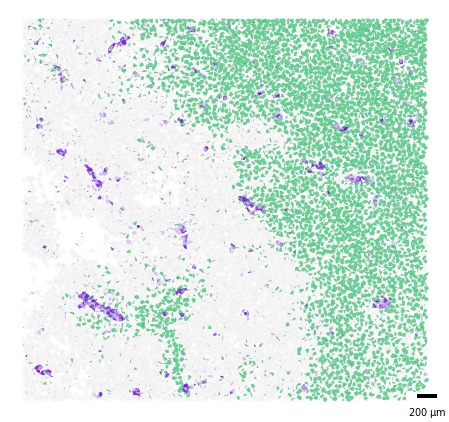

In [14]:
selected = ['AC-like 3','Mural', 'Endothelial']
sp.pl.plot_polygons(
    adata,
    'SL035B',
    cluster_key= 'm-states',
    xlim=(11000,15000),
    ylim=(5000,9000),
    clusters = selected, 
    grey_clusters=grey,
    palette = palette,
    area_min_size=10,
    alpha_gray=0.25,
    linewidth_gray=0,
    figsize=(5,5),

)

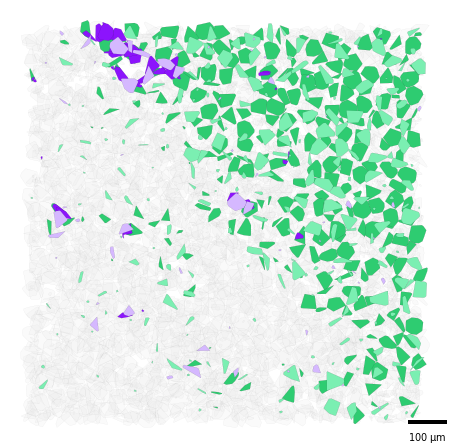

In [15]:
palette_new = palette

selected = ['AC-like 3', 'preOPC-like 1', 'Mural','Endothelial']
sp.pl.plot_polygons(
    adata,
    'SL035B',
    cluster_key= 'm-states',
    xlim=(13000,14000),
    ylim=(6000,7000),
    clusters = selected, 
    grey_clusters=grey,
    palette = palette,
    alpha=1,
    area_min_size=10,
    alpha_gray=0.25,
    figsize=(5,5),

)

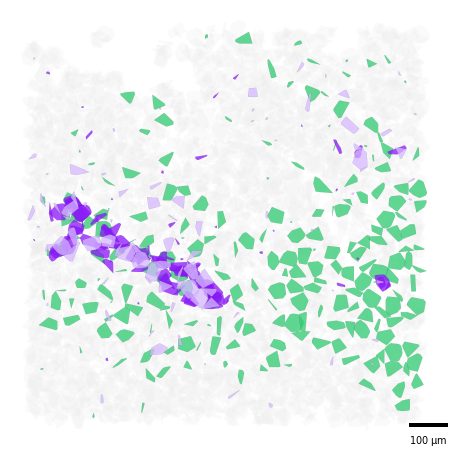

In [16]:
selected = ['AC-like 3' ,'Mural','Endothelial']
sp.pl.plot_polygons(
    adata,
    'SL035B',
    cluster_key= 'm-states',
    xlim=(11500,12500),
    ylim=(5500,6500),
    clusters = selected, 
    grey_clusters=grey,
    alpha_gray=0.25,
    linewidth_gray=0,
    palette = palette,
    area_min_size=10,
    figsize=(5,5),
    show_axis=False,

)